# Correlation and Simple Linear Regression Tutorial
Learning Objectives
* Calculate a correlation coefficient
* Use the non-parametric Spearman's correaltion
* Estimate the intervept and slopes of regression models using ordinary least squares
* Test regression models
* Plot regression lines
* Examine residual plots for deviations from the assumptions of linear regression

In [3]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
fruitfly=pd.read_csv('FruitFly.csv')
fruitfly

,fatherTelomere,offspringLifespan
0,0.35,-0.32
1,0.03,-0.03
2,0.14,0.11
3,0.10,0.28
4,0.22,0.31
5,0.23,0.18
6,0.30,0.29
7,0.32,0.27
8,0.31,0.19
9,0.31,0.12


<AxesSubplot:xlabel='fatherTelomere', ylabel='offspringLifespan'>

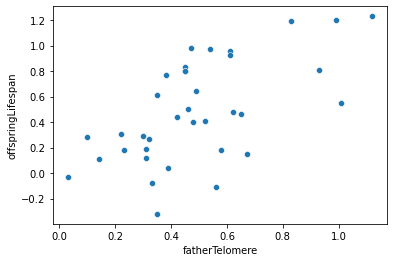

In [5]:
sns.scatterplot(x="fatherTelomere",y="offspringLifespan",data=fruitfly)

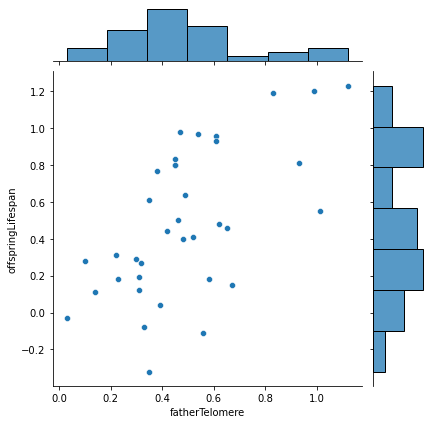

In [6]:
sns.jointplot(x="fatherTelomere",y="offspringLifespan",data=fruitfly)

In [7]:
stats.pearsonr(x=fruitfly["fatherTelomere"],y=fruitfly["offspringLifespan"])

(0.6141042561630583, 6.783713628564802e-05)

In [8]:
stats.spearmanr(fruitfly["fatherTelomere"],fruitfly["offspringLifespan"])

SpearmanrResult(correlation=0.579228669511785, pvalue=0.0002143521595948664)

Let's explore the normality of the 2 variables.  Normality of the variables is not required, but it is a good idea to get a feel for the distribution of the variables.

In [9]:
stats.shapiro(fruitfly["fatherTelomere"])

ShapiroResult(statistic=0.9489876627922058, pvalue=0.09717478603124619)

In [10]:
stats.shapiro(fruitfly["offspringLifespan"])

ShapiroResult(statistic=0.9736367464065552, pvalue=0.5328620076179504)

# Fit a Simple Linear Regression Model

We will now fit a SLR model to the data.  We will use linear regression to regress the outcome (y, dependent value) of offspringLifespan on the predictor (x, regressor, explainatory or independent value) of fatherTelemere length.  

In our data set we have y as the dependent variable, and x as the independent variable. We will first analyze how our model performs using just the x variable to predict y (regress y on x).  This is simple linear regression.

Regression models can be built in python using the from statsmodels.formula.api library, which contains an ols class. The ols class takes as input a DataFrame as well as a string expression indicating which form the regression model should take based on the column names of the dataframe. The general format is "dependent_var_col_name ~ independent_var1_col_name + independent_var2_col_name + ...".

The ols command create the ols model object while the .fit() command computes the regression model and returns the model results. Let's see what's contained in the results of the model when we print out the summary results.

In [11]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
#fit the simple linear regression model
model=ols('y~x',{'x':fruitfly["fatherTelomere"],'y':fruitfly["offspringLifespan"]})
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     20.59
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           6.78e-05
Time:                        06:53:47   Log-Likelihood:                -9.1679
No. Observations:                  36   AIC:                             22.34
Df Residuals:                      34   BIC:                             25.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051      0.119      0.043      0.9

In [12]:
model=ols("offspringLifespan~fatherTelomere",data=fruitfly)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      offspringLifespan   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     20.59
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           6.78e-05
Time:                        06:53:48   Log-Likelihood:                -9.1679
No. Observations:                  36   AIC:                             22.34
Df Residuals:                      34   BIC:                             25.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0051      0.119      0.

In this example:
* The intercept term (b0) = 0.0051
* The slope term (b1) = 0.9823.  This is the estimate of the slope of the regression line.  This implies that on average a unit increase in x (fatherTelomere length) results in an increase of y (offspringLifespan days) of 0.9823 units
* The t-value for the intercept term is -4.537 - Python calls this the t-value because it comes from the t-distribution.
* The 95% confidence interval for the slope term are \[0.542,  1.422\].
* The confidence interval does not cross zero meaning that zero is not a plausible value for the coefficients. x therefore significantly impacts the value of y.
* The $R^2$ value is 0.377

Note that for Simple Linear Regression, $r^2$ is equal to $R^2$ \
r= 0.6141 \
$R^2$ is the coefficient of detrmination and is the proportion of variation in the dependent variable that is predicted from the independent variables.  It will be reviewed in detail when we discuss goodness of the model fit.  The value of 0.377 means that the model (here our one predictor variable) explains 37.7% of the variability in our outcome.  

The standard error ad the p-value for the predictor is provided.  Here we can see that the p-value for the null hypothesis that the true population slope is 0 is very low, less than 0.001.  

The best fit of the line fitted to this data is:  \
offspringLifespan = 0.0051 + (0.9823*fatherTelomere)

The top of the summary gives the OLS Regression Results with some model statistics.  A main one here is the $R^2$ value.  

The next part of the summary provides the coefficients for the fitted line.  The intercept is if all predcitor variables were at 0; it is the b0 or a in the fitted line and is the constant added to explain the stating point for the line.  The x coef provides the measurement of how the change in that variable affects the dependent variable and is the b or m in the fitted line.

Create and interpret the anova table. Let's investigate the results in more detail by checking the ANOVA table. ANOVA related methods can be found in the `statsmodels.stats.anova` library in the `anova_lm` class.

Interpret the F test, the and work through finding the F ratio from the anova results. 

Calculate the coefficiect of deterination from the ANOVA table.

In [13]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results)
print(anova_results)

                  df    sum_sq   mean_sq          F    PR(>F)
fatherTelomere   1.0  2.123782  2.123782  20.585507  0.000068
Residual        34.0  3.507740  0.103169        NaN       NaN


A key additional piece of information we haven't got yet is the standard error of the model. The `scale` parameter of the model results provides the mean squared error, as does the anova table.  

What is the standard error of the model, and what does it tell you?

Note that you can find the attributes of your results obhect that you have made in the ols model by calling the attribute.  You cn list these by calling its directory through:  dir(results1)

See that one of these is the .scale attribute

In [14]:
mean_squared_error = results.scale
print("The model mean squared error is: " +str(mean_squared_error))
print("The model standard error is: " + str(np.sqrt(mean_squared_error)))

The model mean squared error is: 0.10316881837818552
The model standard error is: 0.32119903234316494


# Assumptions of SLR Review

L:  Linear relationship assumed.  The mean of the response varaibles in a linear combination of the parameters (regression coefficients) and predcitor variables.  Models have to be linear in the parameters. 

I:  Independence of residuals:  Observations are independent of each other. Errors should be uncorrealted (No autocorrelation) which can often occur with time series data or other dependent datasets.  

N:  Normality:  Normal distribution of the residuals.  The resdiuals have a normal distribution conditional of the regressors (predictors).   

E:  Equal variance of the residuals.  This equality of the variance of the residuals is also called homoscedasticity.  The variance of the residuals is the same for any value of the predictor.


# Residual (error) review

We will calculate the prediction and the errors and review these.  First we will plot the predictor against the actual y value and the fitted line.  This gives us some idea of the linerarity and the residual behavior. 

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


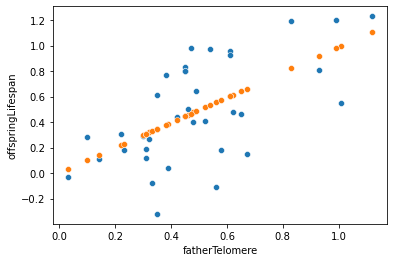

In [15]:
# Calculate the predictions and errors based on the model
y_pred=0.0051+0.9823*fruitfly["fatherTelomere"]
y_value=fruitfly["offspringLifespan"]
error=y_value-y_pred
ax=sns.scatterplot(fruitfly["fatherTelomere"],fruitfly["offspringLifespan"])
ax=sns.scatterplot(fruitfly["fatherTelomere"],y_pred)

Next we will look at the predicton and the residuals.  We can see if the errors are scattered above and below the 0 line randomly or if they have a shape that could mean that linearity is not met.  This also shows that the variance of the resduals is fairly equal across values of the predctor, checking the assumption of equal variance of the errors (the errors are fairly equal below and above the 0 line).  We can also scan for any independence issues to see if there is correlation in the residuals.  

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


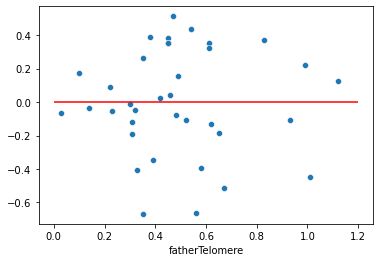

In [16]:
sns.scatterplot(fruitfly["fatherTelomere"],error)
plt.hlines(0,0,1.2,color='red')

You can call the statsmodels graphics call for plot_regress_exog as in the exmpale below to see several linera regression diagnostic plots easily. You can see the top two are equivalent to the ones we produced.  

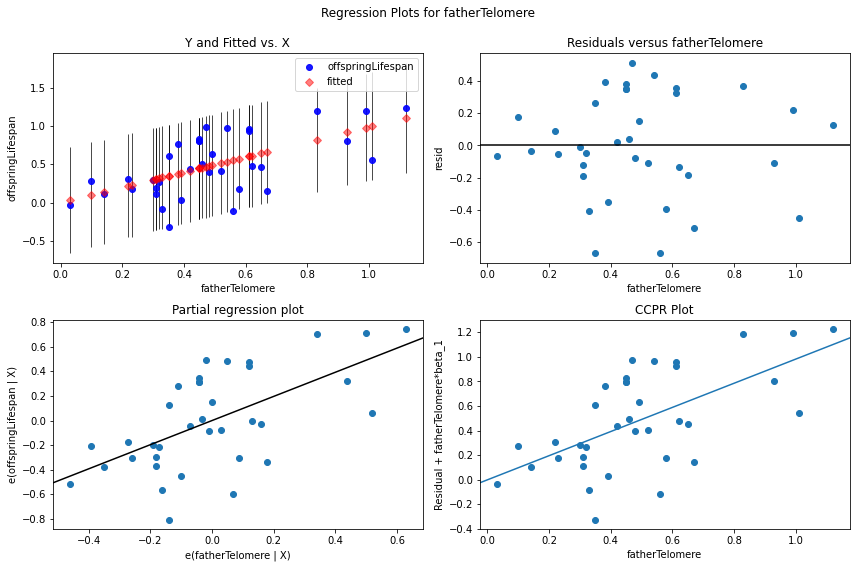

In [17]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'fatherTelomere',fig=fig)

Checking for the normality of the errors, we can look at the resiudals on a qplot against a normal distribution, plot the histogram of the erros, or run a test of normality with the residuals to make sure that this assumption is met.

The residuals are kept in an array conatining the difference between the observed y adn the values of fitted y predicted by the linear model.  You can use these directly from our results from the regression ols model that we fitted above.  

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


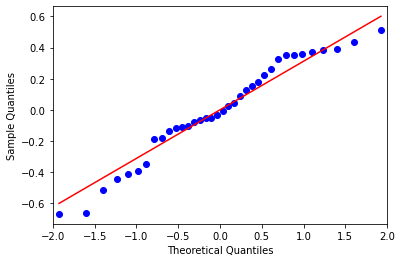

In [18]:
sm.qqplot(results.resid,line='s')
plt.show()

<AxesSubplot:ylabel='Density'>

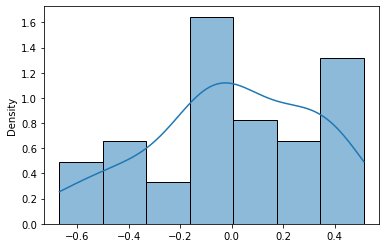

In [19]:
sns.histplot(x=results.resid, stat='density',kde=True)

In [20]:
stats.shapiro(results.resid)

ShapiroResult(statistic=0.9564460515975952, pvalue=0.16669777035713196)

Let's plot the data and the linear regression fitted line directly throgh regplot.  We can see the 95% CI of the regression estimate.

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fatherTelomere', ylabel='offspringLifespan'>

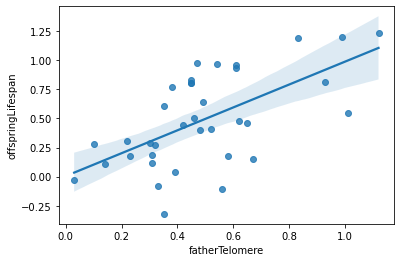

In [21]:
#Plot data and the linear regression model fit
# 95% CI for the regression estimate
sns.regplot(fruitfly["fatherTelomere"],fruitfly["offspringLifespan"],fit_reg=True,ci=95)

# Confidence Intervals and Prediction Intervals

Find the prediction summary for your model

In [22]:
predictions=results.get_prediction(fruitfly).summary_frame(alpha=0.05)
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.348884,0.061607,0.223683,0.474085,-0.315770,1.013537
1,0.034552,0.113225,-0.195548,0.264653,-0.657571,0.726676
2,0.142604,0.092925,-0.046242,0.331450,-0.536919,0.822127
3,0.103312,0.100128,-0.100171,0.306796,-0.580423,0.787048
4,0.221187,0.079397,0.059832,0.382541,-0.451215,0.893589
5,0.231010,0.077812,0.072877,0.389142,-0.440627,0.902646
6,0.299769,0.067622,0.162345,0.437194,-0.367295,0.966834
7,0.319415,0.065067,0.187183,0.451647,-0.346599,0.985429
8,0.309592,0.066322,0.174811,0.444374,-0.356932,0.976117
9,0.309592,0.066322,0.174811,0.444374,-0.356932,0.976117


Create a plot showing the 95% confidence intervals and the 95% predcition innteravls for the fitted line.

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nabil\anacond

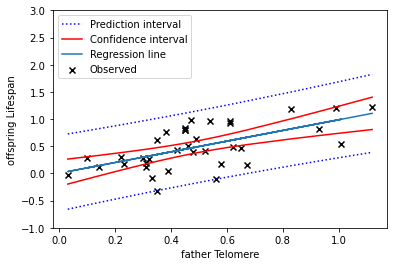

In [36]:
ax=sns.lineplot(fruitfly['fatherTelomere'], predictions['obs_ci_upper'],label='Prediction interval',linestyle=':',color='b')
ax=sns.lineplot(fruitfly['fatherTelomere'], predictions['obs_ci_lower'],linestyle=':',color='b')
ax=sns.lineplot(fruitfly['fatherTelomere'], predictions['mean_ci_upper'],label='Confidence interval',color='red')
ax=sns.lineplot(fruitfly['fatherTelomere'],predictions['mean_ci_lower'],color='red')
ax=ax=plt.scatter(fruitfly['fatherTelomere'], fruitfly['offspringLifespan'], label='Observed', marker='x', color='black')
plt.plot(fruitfly['fatherTelomere'], predictions['mean'], label='Regression line')
plt.xlabel('father Telomere')
plt.ylabel('offspring Lifespan')
plt.ylim(-1,3)
plt.legend()
plt.show()

In [62]:
fruitfly['fatherTelomere']

0     0.35
1     0.03
2     0.14
3     0.10
4     0.22
5     0.23
6     0.30
7     0.32
8     0.31
9     0.31
10    0.39
11    0.33
12    0.56
13    0.67
14    0.58
15    1.01
16    0.93
17    0.62
18    0.65
19    0.52
20    0.48
21    0.42
22    0.46
23    0.49
24    0.35
25    0.38
26    0.45
27    0.45
28    0.45
29    0.47
30    0.54
31    0.61
32    0.61
33    0.83
34    0.99
35    1.12
Name: fatherTelomere, dtype: float64